#Set up

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
%pip install opendatasets #{"username":"phuongleanh","key":"bfb9d4fb494830b2319c202c71c7977f"}
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phuongleanh
Your Kaggle Key: ··········


100%|██████████| 1.55k/1.55k [00:00<00:00, 981kB/s]

In [3]:
df= pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(columns='CustomerID',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#Exploration of data

<Axes: xlabel='Age', ylabel='Count'>

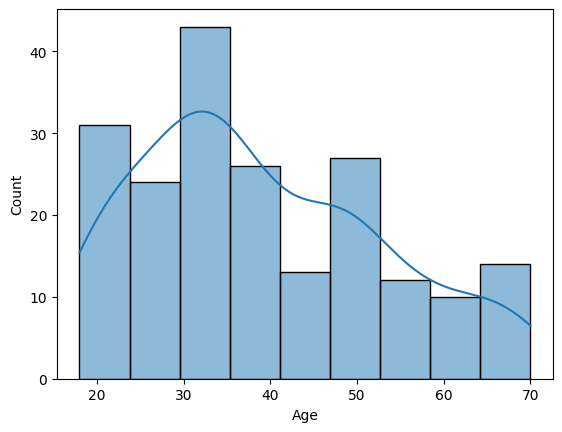

In [7]:
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

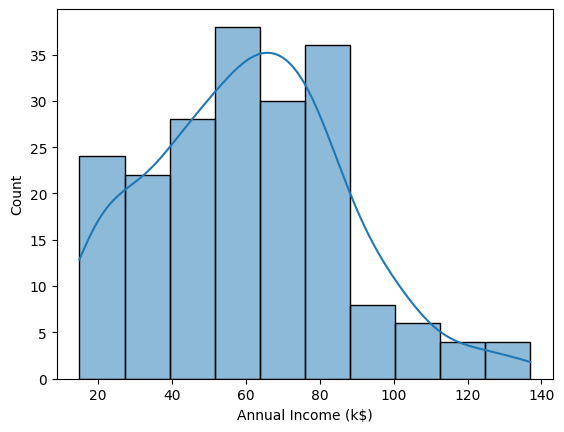

In [8]:
sns.histplot(df['Annual Income (k$)'],kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

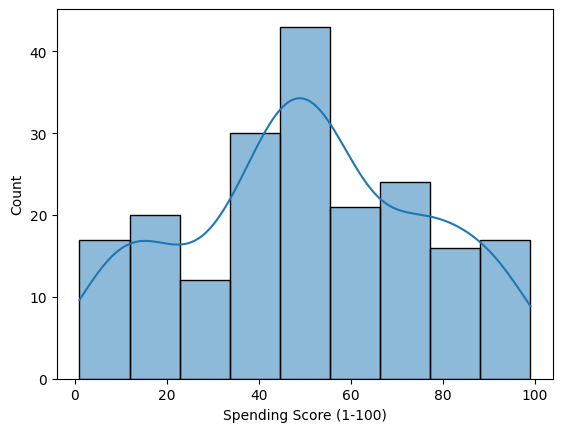

In [9]:
sns.histplot(df['Spending Score (1-100)'],kde=True)

<Axes: xlabel='Gender'>

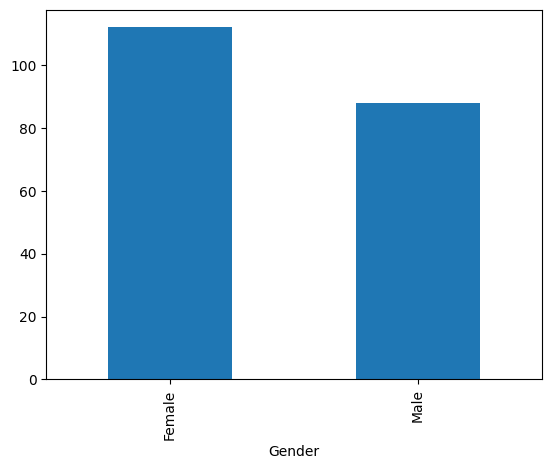

In [10]:
df.groupby('Gender').size().plot(kind='bar')

In [11]:
df=pd.get_dummies(df, columns=['Gender'])

<Axes: >

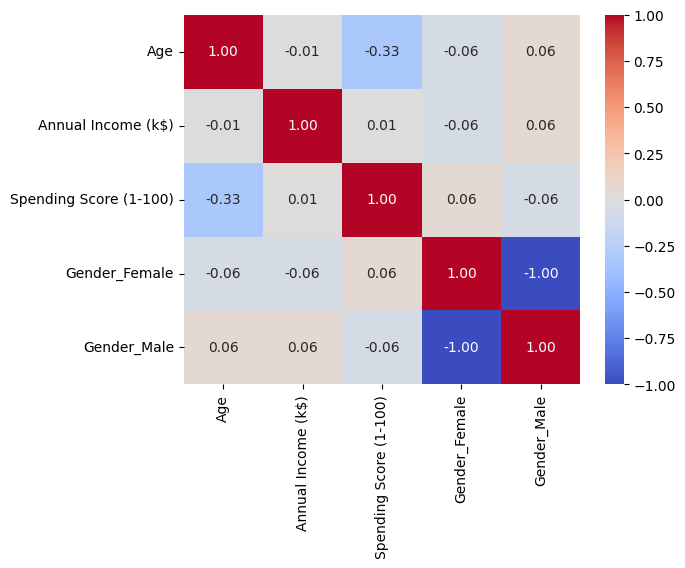

In [12]:
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm")

Spending Score (1-100) vs Age

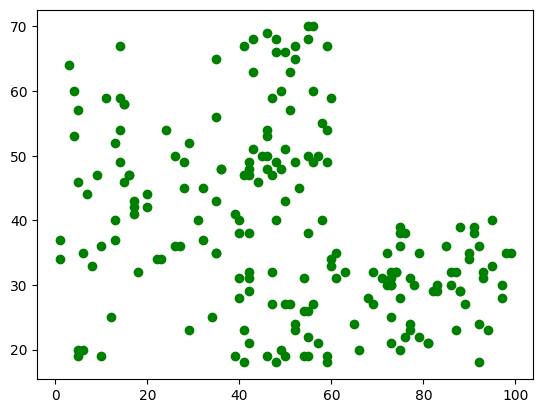

In [13]:
plt.scatter(df['Spending Score (1-100)'], df['Age'],c="g")

In [19]:
x = df[['Spending Score (1-100)', 'Age']].values

#Build model

In [39]:
class K_Means():
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, x):
        col_min, col_max = x.min(axis=0), x.max(axis=0)
        self.centroids = np.array([np.random.rand(x.shape[1])*col_max + col_min for i in range(self.n_clusters)])

        for i in range(self.max_iter):
            clusters_idxs = self.predict(x)
            for c in range(self.n_clusters):
                if c in clusters_idxs:
                    self.centroids[c] = np.mean(x[c == clusters_idxs], axis=0)

    def predict(self, x):
        distances = cdist(x, self.centroids)
        return np.argmin(distances, axis=1)

def plotKMeans(x, centroids):
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:, 0], x[:, 1], c='g')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red')

    # Plotting contour lines for each cluster
    for i in range(len(centroids)):
        cluster_points = x[kmeans.predict(x) == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='g', alpha=0.3)

        # Generate a meshgrid within the range of cluster points
        x_min, x_max = cluster_points[:, 0].min() - 1, cluster_points[:, 0].max() + 1
        y_min, y_max = cluster_points[:, 1].min() - 1, cluster_points[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        # Predict labels for meshgrid points
        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot contour lines
        plt.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.5)

    plt.show()

[[13.56818182 43.27272727]
 [82.35087719 30.1754386 ]
 [50.47368421 25.07894737]
 [50.63636364 63.90909091]
 [44.02564103 45.82051282]]


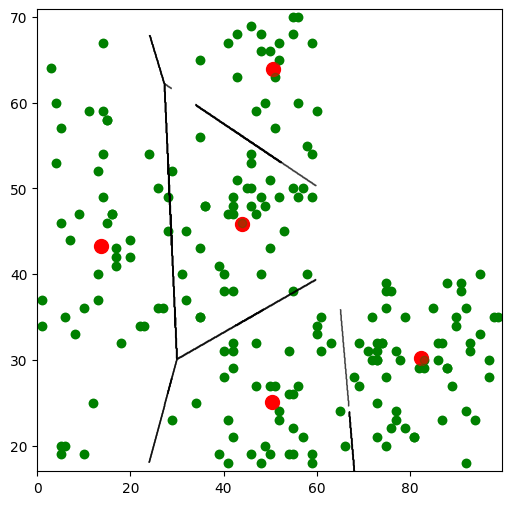

In [44]:
kmeans = K_Means(n_clusters=5, max_iter=150)
kmeans.fit(x)

print(kmeans.centroids)

plotKMeans(x, kmeans.centroids)